In [41]:
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw, ImageFont
from skimage import restoration as res
import cv2, numpy as np
from IPython.display import  display

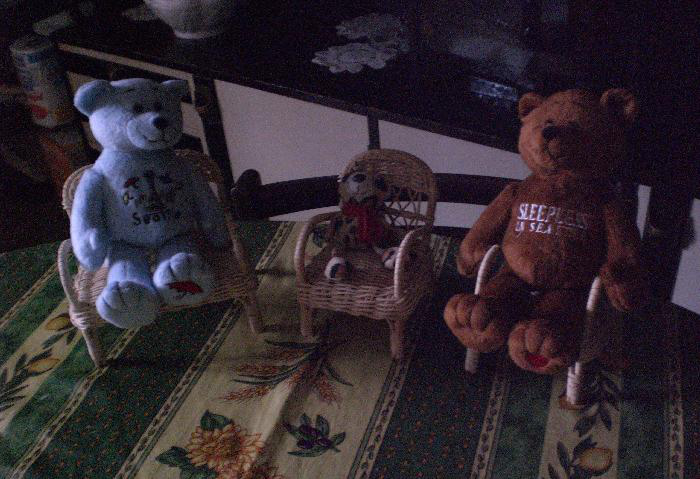

In [2]:
im = Image.open("images_png/0.png")
im

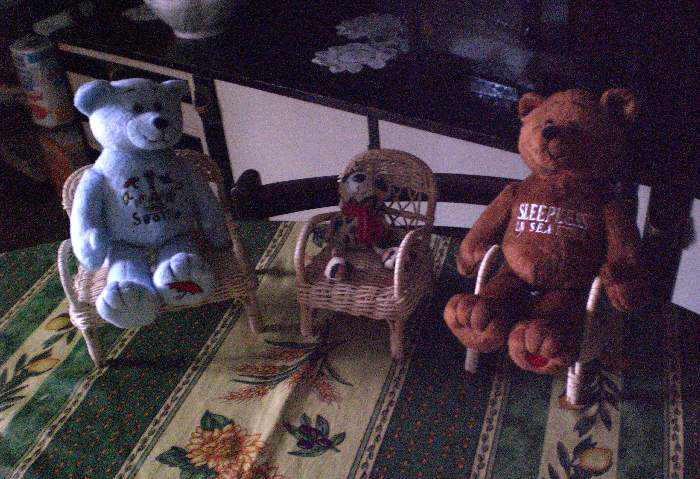

In [3]:
imEnhance = ImageEnhance.Brightness(im)
imEnhance.enhance(1.4)

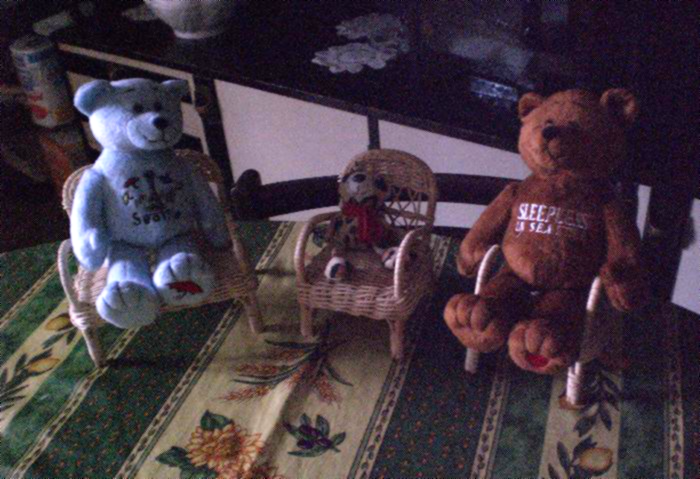

In [4]:
imEnhance.enhance(1.4).filter(ImageFilter.SMOOTH)

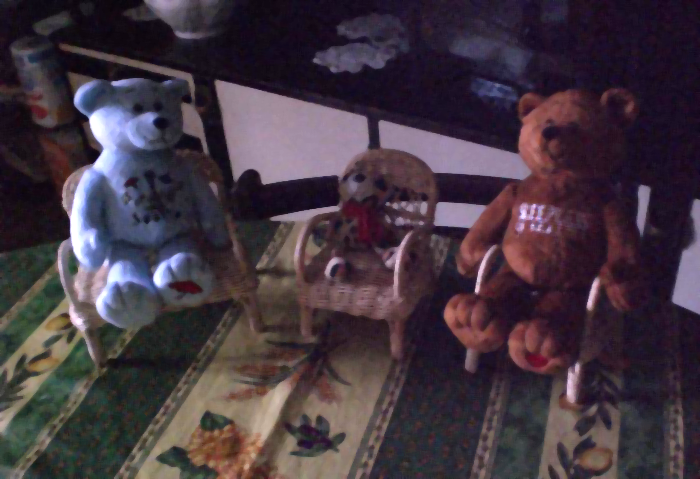

In [5]:
imEnhance.enhance(1.4).filter(ImageFilter.MedianFilter(5))

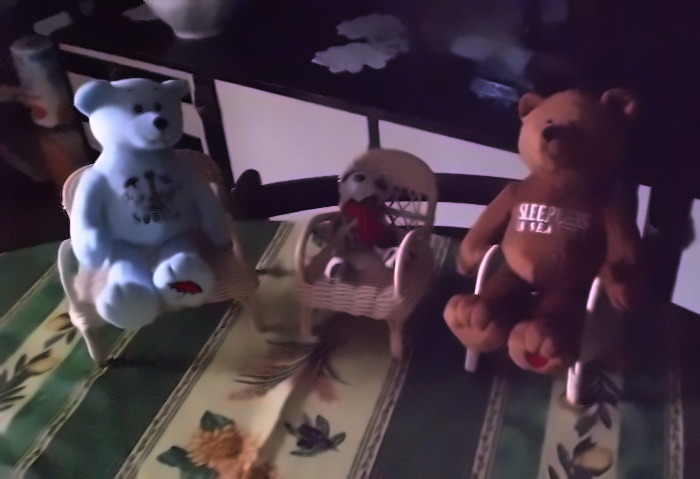

In [37]:
# imArray = cv2.imread("images_png/0.png")
imArray = np.asarray(imEnhance.enhance(1.5))
# cv2.cvtColor(imArray, cv2.COLOR_BGR2RGB, imArray)
denoise = cv2.fastNlMeansDenoisingColored(imArray, h=20,hColor=15)
Image.fromarray(denoise)

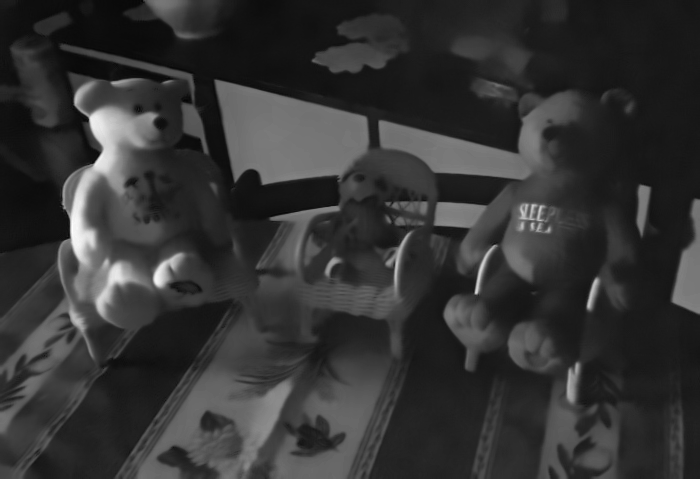

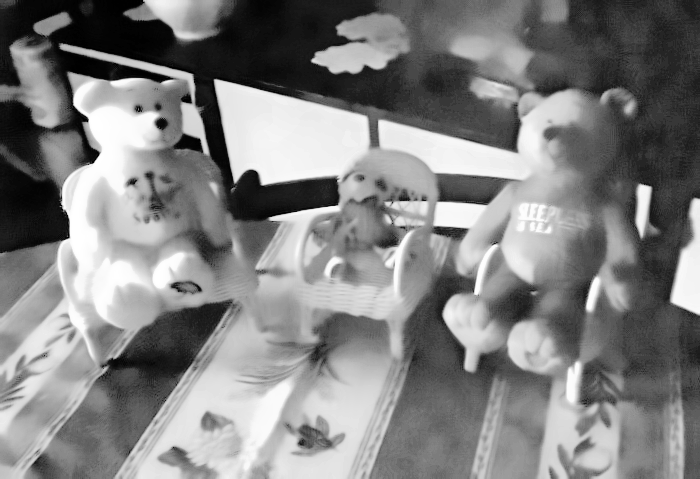

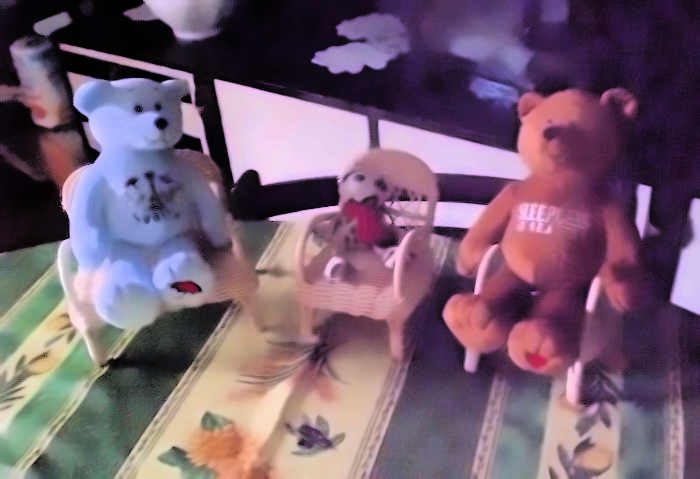

In [23]:
# imArray = cv2.imread("images_png/0.png")
imArray = np.asarray(imEnhance.enhance(1))
# cv2.cvtColor(imArray, cv2.COLOR_BGR2RGB, imArray)
denoise = cv2.fastNlMeansDenoisingColored(imArray, h=20,hColor=15)
imHSV = cv2.cvtColor(denoise, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(imHSV)
newV = cv2.equalizeHist(v)
display(Image.fromarray(v), Image.fromarray(newV))
imNewHSV = cv2.merge([h,s,newV])
display(Image.fromarray(cv2.cvtColor(imNewHSV, cv2.COLOR_HSV2RGB)))
# Image.fromarray(denoise)

In [34]:
def high_pass(input : np.array, threshold : int):
    inputGrey = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
    Ff1 = np.fft.fft2((inputGrey).astype(float))
    Ff2 = np.fft.fftshift(Ff1)

    (width, height) = inputGrey.shape
    half_w, half_h = int(width/2), int(height/2)

    # high pass filter
    n = threshold
    Ff2[half_w-n:half_w+n+1,half_h-n:half_h+n+1] = 0 # select all but the range (low) frequencies

    im1 = np.fft.ifft2(np.fft.ifftshift(Ff2)).real
    return im1

# imArray = cv2.imread("images_png/0.png")
imArray = np.asarray(imEnhance.enhance(1.4))
# cv2.cvtColor(imArray, cv2.COLOR_BGR2RGB, imArray)
denoise = cv2.fastNlMeansDenoisingColored(imArray, h=20,hColor=15)
imHighPass = high_pass(denoise, 20)
Image.fromarray(imHighPass).show()


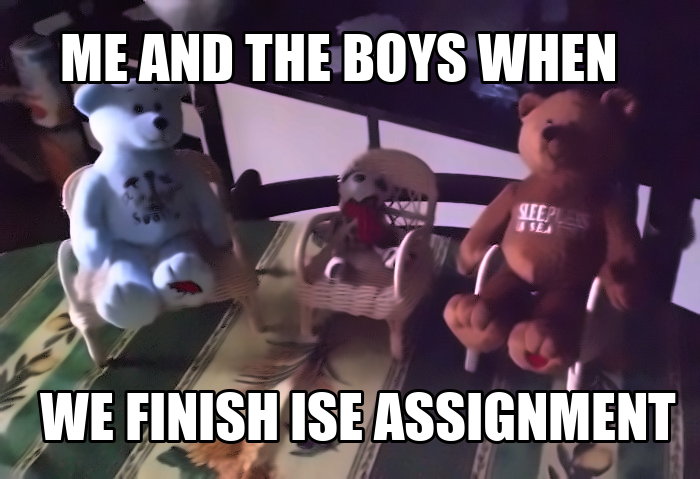

In [53]:
# imArray = cv2.imread("images_png/0.png")
imArray = np.asarray(imEnhance.enhance(1.7))
# cv2.cvtColor(imArray, cv2.COLOR_BGR2RGB, imArray)
denoise = cv2.fastNlMeansDenoisingColored(imArray, h=20,hColor=15)
imDenoise = Image.fromarray(denoise)
draw = ImageDraw.Draw(imDenoise)

font = ImageFont.truetype("impact.ttf", 60)

draw.text((60,20), "ME AND THE BOYS WHEN", font=font, stroke_width=3, stroke_fill=(0,0,0))
draw.text((40,imDenoise.height - 100), "WE FINISH ISE ASSIGNMENT", font=font, stroke_width=3, stroke_fill=(0,0,0), align="center")
imDenoise